# Logistic Regression Revisited

I have been meaning to revisit logistic regression for a while now. I have learned it in class, and while I understand what is going on, I wanted to solidify my understanding. I came across logistic regression few times in college during Econometrics courses, but it was usually taught briefly at the very end, so I never felt like I had a solid understanding of it. Also, coming from a math background, I like to have a full understanding before implementing it. I am certain that there are many resources out there, but I made a note for future me. Sadly I did not have patience to sit through Andrew Ng's video (which are wonderful btw), so I read [**Introductionto Statistical Learning**](http://www-bcf.usc.edu/~gareth/ISL/) instead. Consequently, this follows closely to that book. Let's get started!

**What is Logistic Regression?** Logistic regression is a classification algorithm that returns the probability that the target belongs to a certain category. While logistic regression can be used for multi-class (more than 2) we will only consider its use for binary class (either 0 or 1).

**Why not use Linear Regression?** While linear regression is intuitive, it has a drawback. If we fit a linear model on our data, we will get probabilty $p(X) = \beta_0 + \beta_1X$. This however means that we will get negative predicted probability and probability that is greater than one, which does not make sense as aprobability since probability should fall between 0 and 1.

The solution to this problem is to use a function that outputs only within 0 and 1 range for any possible value of inputs. The *logistic function* is such a function that satisfy this condition. It is not the only function that satisfies this, but it is by far the most popular one. It is of the form:  
$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

Let's take a look at visualization to see the difference between the two.

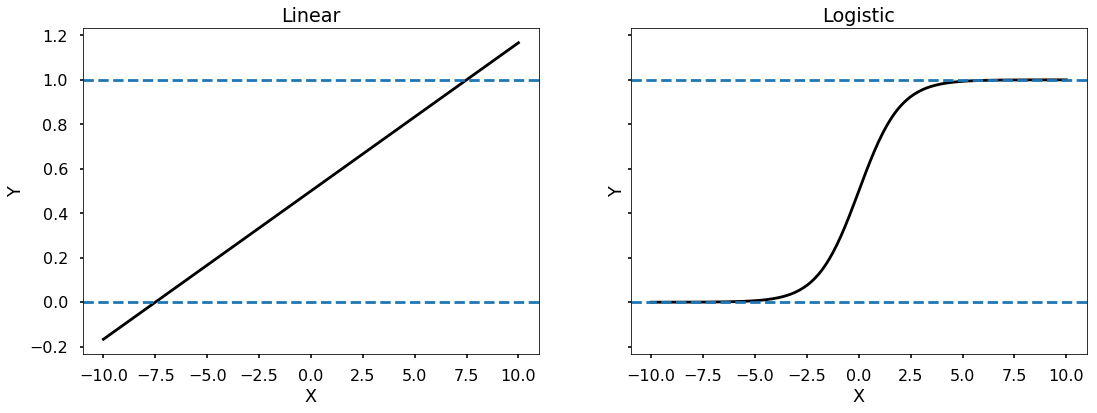

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10,200)
y1 = X/15 + 0.5
y2 = np.exp(X) / (1 + np.exp(X))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,6))
ax1.plot(x, y1,'k')
ax1.set_title('Linear')
ax1.axhline(0,linestyle='--')
ax1.axhline(1,linestyle='--')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.plot(x, y2,'k')
ax2.set_title('Logistic')
ax2.axhline(0,linestyle='--')
ax2.axhline(1,linestyle='--')
ax2.set_xlabel('X')
ax2.set_ylabel('Y');

As expected, our linear function goes outside the range, while logistic stays within.

We can rearange $(1)$: 

$$p(X)(1 + e^{\beta_0 + \beta_1X}) = e^{\beta_0 + \beta_1X}\notag$$  

$$p(X) + p(X)e^{\beta_0 + \beta_1X} = e^{\beta_0 + \beta_1X}\notag$$ 

$$p(X) = e^{\beta_0 + \beta_1X} - p(X)e^{\beta_0 + \beta_1X}\notag$$  

$$p(X) = e^{\beta_0 + \beta_1X}(1 - p(X))\notag$$  

$$\frac{p(X)}{(1 - p(X))} = e^{\beta_0 + \beta_1X}$$  

The left-hand side, $\large\frac{p(X)}{(1 - p(X))}$ is called the odds and can take any values from $0$ to $\infty$. How do we interpret this? The odds close to $0$ imply very high probability while odds $\infty$ imply very high probability respectively. With the odds of $\frac{1}{9}$, 1 in 10 people on average will take value 1, since $p(X) = 0.1$ implies an odds of $\frac{0.1}{1-0.1} = \frac{1}{9}$. Likewise, the odds of $\frac{1}{4}$ indicates that on average, two out of every ten people will take value 1, since $p(X) = 0.2$ implies an odds of $\frac{0.2}{1-0.2} = \frac{1}{4}$.

To get a more familiar form on the right side, we take the log on both sides of $(2)$.  
$$log(\frac{p(X)}{(1 - p(X))}) = \beta_0 + \beta_1X$$ 

Now the left-hand side is called the *log-odds* or *logit*. In logistic regression, we have a log-odds that is linear with respect to X.

**How to interpret $\beta$s?** Recall that in linear regression model, $\beta_1$ represents the average change in target Y associated with a unit increase in X. In logistic regression, $\beta_1$ represents the average change in log-odds associated with a unit increase in X. This can be seen from the $(3)$.

**How do we get $\beta$s?** In linear regression, we used least squares to find $\hat\beta_0$ and $\hat\beta_1$. In logistic regression we use maximum likelihood. The formula for likelihood function is:

$$l(\beta_0, \beta_1) = \prod_{i: y_i = 1}p(x_i) \prod_{i': y_i' = 0}(1 - p(x_i'))$$

We want $\hat\beta_0$ and $\hat\beta_1$ that maximize this likelihood function, and since there is a lot going on here, let's unpack one by one. The left hand side is likelihood function. $\prod$ is like a $\sum$ function but it is taking the product instead of the sum. Therefore, $\prod_{i: y_i = 1}p(x_i)$ is the product of probabilities of y equalling one for those observations that are actually equal to one, and $\prod_{i': y_i' = 0}(1 - p(x_i'))$ is the product of probabilities of y equalling zero for those observations that are actually zero.So, this is it. I hope this helped. 

Thanks for reading!